# Import Library

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [71]:
df = pd.read_csv("/content/1. SuperMarket sales.csv")
print(df.head)

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428   Alex     Yangon        Member  Female   
1    226-31-3081   Giza  Naypyitaw        Normal  Female   
2    631-41-3108   Alex     Yangon        Normal  Female   
3    123-19-1176   Alex     Yangon        Member  Female   
4    373-73-7910   Alex     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
995  233-67-5758   Giza  Naypyitaw        Normal    Male   
996  303-96-2227  Cairo   Mandalay        Normal  Female   
997  727-02-1313   Alex     Yangon        Member    Male   
998  347-56-2442   Alex     Yangon        Normal    Male   
999  849-09-3807   Alex     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Sales  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

# Cleaning Data

In [72]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [73]:
df["Date"] = pd.to_datetime(df["Date"])

In [74]:
df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()

In [75]:
print(df.head)

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428   Alex     Yangon        Member  Female   
1    226-31-3081   Giza  Naypyitaw        Normal  Female   
2    631-41-3108   Alex     Yangon        Normal  Female   
3    123-19-1176   Alex     Yangon        Member  Female   
4    373-73-7910   Alex     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
995  233-67-5758   Giza  Naypyitaw        Normal    Male   
996  303-96-2227  Cairo   Mandalay        Normal  Female   
997  727-02-1313   Alex     Yangon        Member    Male   
998  347-56-2442   Alex     Yangon        Normal    Male   
999  849-09-3807   Alex     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Sales  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

# Data Explore

### sales per branch

In [76]:
sales_by_branch = df.groupby("Branch")["Sales"].sum().sort_values(ascending=False)
print(sales_by_branch)

Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64


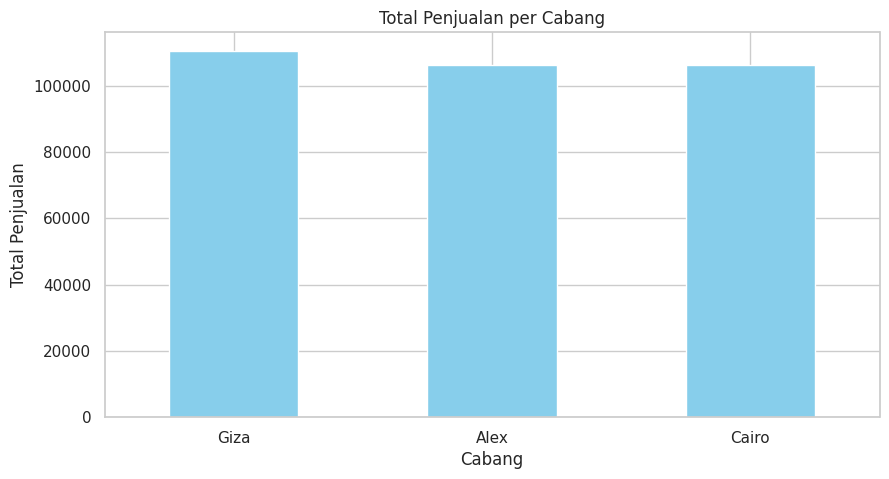

In [77]:
sales_by_branch.plot(kind="bar", color="skyblue", title="Total Penjualan per Cabang")
plt.ylabel("Total Penjualan")
plt.xlabel("Cabang")
plt.xticks(rotation=0)
plt.show()

## sales per item

In [78]:
sales_by_item = df.groupby("Product line")["Sales"].sum().sort_values()
print(sales_by_item)

Product line
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Fashion accessories       54305.8950
Electronic accessories    54337.5315
Sports and travel         55122.8265
Food and beverages        56144.8440
Name: Sales, dtype: float64


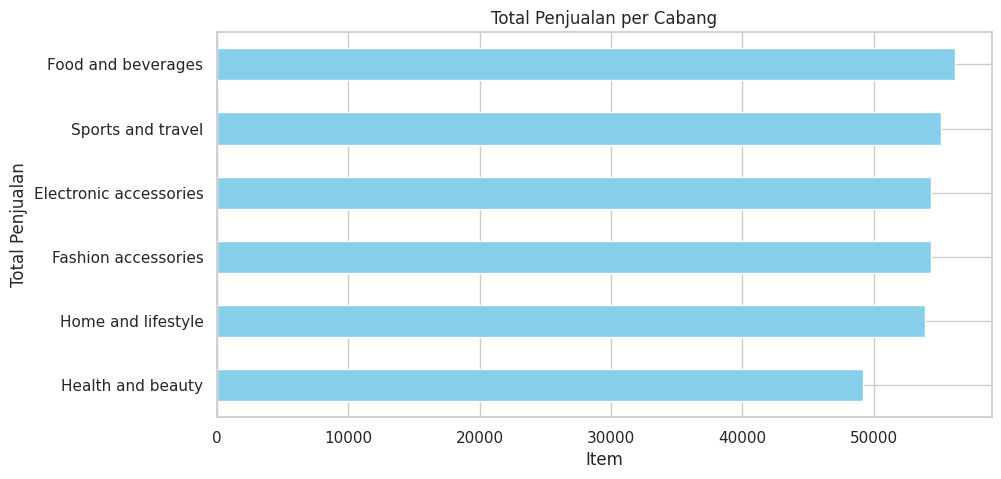

In [79]:
sales_by_item.plot(kind="barh", color="skyblue", title="Total Penjualan per Cabang")
plt.ylabel("Total Penjualan")
plt.xlabel("Item")
plt.xticks(rotation=0)
plt.show()

## Transaction per day

In [80]:
transactions_per_day = df["Day"].value_counts()
print(transactions_per_day)

Day
Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: count, dtype: int64


<ipython-input-81-3b98fd90b9a7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values, palette="pastel")


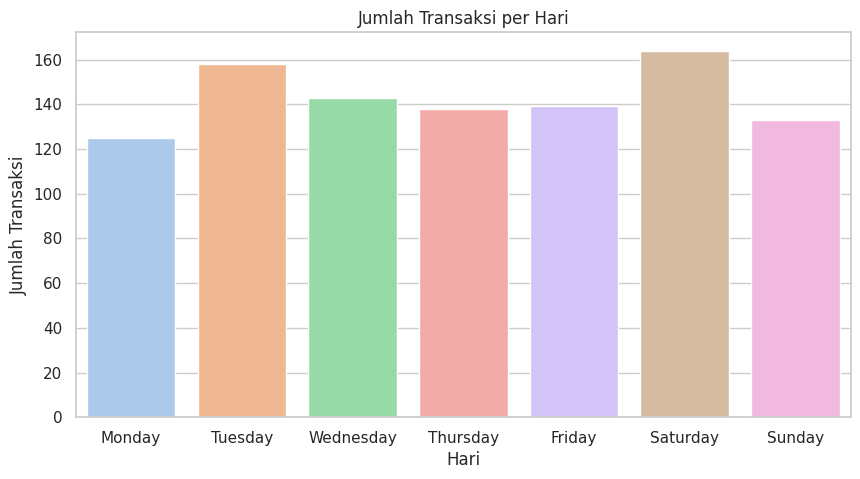

In [81]:
hari = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df["Day"] = pd.Categorical(df["Day"], categories=hari, ordered=True)

transactions_per_day = df["Day"].value_counts().sort_index()

sns.barplot(x=transactions_per_day.index, y=transactions_per_day.values, palette="pastel")
plt.title("Jumlah Transaksi per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=0)
plt.show()


## Payment method

In [82]:
payment_methods = df["Payment"].value_counts().sort_values(ascending=False)
print(payment_methods)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


Text(0, 0.5, '')

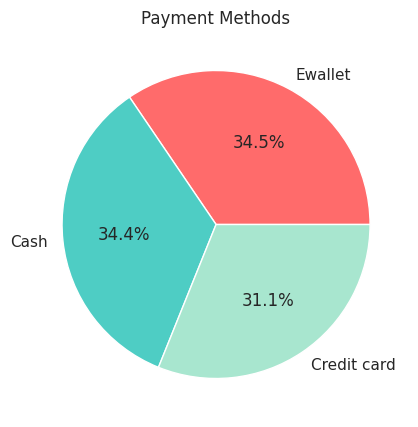

In [83]:
payment_methods.plot(kind="pie", autopct="%1.1f%%", colors = ["#FF6B6B", "#4ECDC4", "#A8E6CF"], title="Payment Methods")
plt.ylabel("")

# INSIGHT

In [84]:
print(f"- Cabang dengan penjualan tertinggi: {sales_by_branch.idxmax()}")
print(f"- Produk terlaris: {sales_by_item.idxmax()}")
print(f"- Hari tersibuk: {transactions_per_day.idxmax()}")
print(f"- Metode pembayaran paling populer: {payment_methods.idxmax()}")


- Cabang dengan penjualan tertinggi: Giza
- Produk terlaris: Food and beverages
- Hari tersibuk: Saturday
- Metode pembayaran paling populer: Ewallet
